In [1]:
def names(cols):
    prop_names = [
        'AP1Amplitude',
        'AP2Amplitude',
        'AP12AmplitudeDrop',
        'AP12AmplitudeChangePercent',
        'AP1SSAmplitudeChange',  

        'AP1WidthHalfHeight',
        'AP2WidthHalfHeight',
        'AP12HalfWidthChangePercent',

        'AP1WidthPeakToTrough',
        'AP2WidthPeakToTrough',

        'AP1RateOfChangePeakToTrough',
        'AP2RateOfChangePeakToTrough',    
        'AP12RateOfChangePeakToTroughPercentChange',

        'AP1AHPDepth',
        'AP2AHPDepth',
        'AP12AHPDepthPercentChange',

        'AP1DelayMean',
        'AP2DelayMean',

        'AP1DelaySD',
        'AP2DelaySD',

        'AP1DelayMeanStrongStim',
        'AP2DelayMeanStrongStim',

        'AP1DelaySDStrongStim',
        'AP2DelaySDStrongStim',

        'Burst1ISIMean',
        'Burst1ISIMeanStrongStim',

        'Burst1ISISD',
        'Burst1ISISDStrongStim',

        'InitialAccommodationMean',
        'SSAccommodationMean',
        'AccommodationRateToSS',
        'AccommodationAtSSMean',
        'AccommodationRateMeanAtSS',


        'ISIMedian',
        'ISICV',
        'ISIBurstMeanChange',

        'SpikeRateStrongStim',

        'InputResistance',

        'SteadyStateAPs',
    
        'FFPassAbove',
        'FFPassBelow',

        'RampSpikes',
    ]

    import numpy as np

    result = [i for i in np.array(prop_names)[np.nonzero(cols)]]
    
    return result

In [4]:
# for root cluster - to classify multi or single and passive spikers
cols = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
names(cols)

['AP2Amplitude']

In [6]:
# for multi spike 0 cluster - 0 sub cluster
cols = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
names(cols)

['ISIBurstMeanChange', 'SpikeRateStrongStim']

In [7]:
# for multi spike 0 cluster - 1 sub cluster
cols = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
names(cols)

['ISIBurstMeanChange', 'SpikeRateStrongStim']

In [15]:
# for multi spike 1 cluster - 0 sub cluster
cols = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
cols = [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
names(cols)

['AP12AmplitudeDrop', 'AP2WidthHalfHeight', 'ISIMedian', 'SpikeRateStrongStim']

In [14]:
# for multi spike 1 cluster - 1 sub cluster
cols = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
names(cols)

['AP2AHPDepth', 'AP2DelayMeanStrongStim', 'AccommodationAtSSMean']

In [1]:
from manager import ModelManager
from tables import Cells, Model_Waveforms, Models
from pandas import DataFrame
import numpy as np
import pandas
from matplotlib import pyplot as plt

pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', 20)

mgr = ModelManager()
mgr.server.connect()

Connecting to server...
Connecting to MySQL database...


In [8]:
cells = Cells.select()

(0, 200)

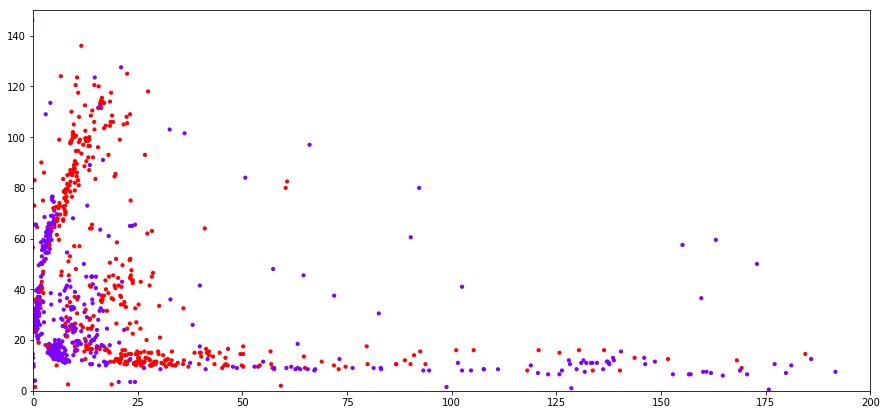

2018-12-30 19:06:08,627| ERROR   | Socket exception: Connection reset by peer (104)


In [17]:
plt.figure(figsize=(15, 7))  
plt.scatter([c.ISIBurstMeanChange for c in cells],[c.SpikeRateStrongStim for c in cells],c=[c.MultiSpikeCluster for c in cells], cmap='rainbow',s=10)
plt.ylim(0,150)
plt.xlim(0,200)